In [1]:
 #Part 1 - Personal Finance Planner

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price

btc_id = requests.get(btc_url).json()
btc_price = btc_id["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_id = requests.get(eth_url).json()
eth_price = eth_id["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51237.60
The current value of your 5.3 ETH is $17242.75


In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_code = os.getenv("ALPACA_CODE")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_code,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-04-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 10000
).df

# Preview DataFrame
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-05 04:00:00+00:00,106.60,106.625,105.74,105.76,11018430,34684,105.931526,AGG
2022-04-05 04:00:00+00:00,455.23,457.830,449.82,451.03,74022189,644313,453.412462,SPY


In [10]:
# Pick AGG and SPY close prices

agg_close_price = df_ticker.iloc[0]["close"]
spy_close_price = df_ticker.iloc[1]["close"]



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}") 


Current AGG closing price: $105.76
Current SPY closing price: $451.03


In [12]:
# Compute the current value of shares
my_agg_value = (agg_close_price * my_agg)
my_spy_value = (spy_close_price * my_spy)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22551.50
The current value of your 200 AGG shares is $21152.00


In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_total=my_btc_value+my_eth_value 
shares_total=my_agg_value+my_spy_value
data = {'type':['crypto', 'shares'], 'amount': [crypto_total, shares_total]}


# Create savings DataFrame
df_savings = pd.DataFrame(data)
df_savings.set_index('type', inplace=True)

# Display savings DataFrame
display(df_savings)

,amount
type,
crypto,68480.355
shares,43703.500


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='type'>

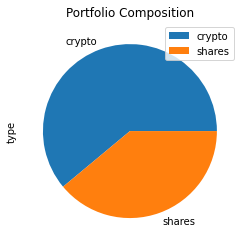

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition", ylabel='type')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"${emergency_fund} is needed for an emergency fund.")


# Calculate total amount of savings
total_savings = crypto_total + shares_total
print(f"${total_savings} is the current total savings amount")

# Validate saving health
if total_savings > emergency_fund:
    print("Congrats! You have saved more than needed for your emergency fund."),
elif total_savings < emergency_fund:
    print("You are {emergency_fund - total_savings} away from saving your emergency fund"),
else:
    print("Your total savings are equal to you emergency fund amount")

$36000 is needed for an emergency fund.
$112183.855 is the current total savings amount
Congrats! You have saved more than needed for your emergency fund.
